# GPU Benchmarking


IN this Notebook we will check the **CPU perfomance** on a deep learning model *during the training *VS **GPU performance** the Training

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from tensorflow import keras

warnings.filterwarnings('ignore')

2024-01-22 16:17:44.033046: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 16:17:44.033084: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 16:17:44.033103: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 16:17:44.039114: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**This command shows list of physical devices available for tensorflow. You can see GPU listed here. If you have NVIDIA GPU you need to install CUDA toolkit and cuDNN as per instruction on the webpage below. Without proper installation you will not see GPU in the list of devices.**

[how to install tensorflow with GPU Cuda ==> Cudnn](https://shawnhymel.com/1961/how-to-install-tensorflow-with-gpu-support-on-windows/)

In [2]:
tf.config.experimental.list_logical_devices()

2024-01-22 16:17:45.499373: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-22 16:17:45.503582: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-22 16:17:45.503779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
print(f"We could check physical device 1 by 1: {tf.config.list_physical_devices('GPU')}")

We could check physical device 1 by 1: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.14.0


In [6]:
print(f"Is the machine has a cuda GPU built in : {tf.test.is_built_with_cuda()}")

Is the machine has a cuda GPU built in : True


### Load Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

<img src="https://media5.datahacker.rs/2022/09/Picture10.jpg">

In [8]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

Visualisation of image

In [17]:
def plot_image(idx):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[idx])

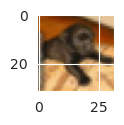

In [19]:
plot_image(56)

In [20]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
y_train[102][0]

9

In [22]:
classes[y_train[102][0]]

'truck'

In [23]:
y_train.shape

(50000, 1)

In [24]:
y_test.shape

(10000, 1)

In [25]:
# Preprocessing image

X_train_scaled = X_train.astype('float32')
X_test_scaled = X_test.astype('float32')
X_train_scaled /= 255
X_test_scaled /= 255

In [26]:
from keras.utils import to_categorical

### Convert `y_train_raw` and `y_test_raw` to binary class matrices
### ENTER YOUR CODE HERE ### (2 lines)
y_train_categorical = to_categorical(y_train, num_classes=10,dtype='float')
y_test_categorical = to_categorical(y_test, num_classes=10,dtype='float')

In [27]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
# The shape of one picture
X_test[0].shape

(32, 32, 3)

### Building The Model

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train_categorical, epochs=1)

2024-01-22 16:47:00.990880: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-01-22 16:47:01.369145: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-01-22 16:47:02.040997: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-22 16:47:02.120715: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efa580454e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-22 16:47:02.120741: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-01-22 16:47:02.126972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-01-22 16:47:02.163907: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This 

1563/1563 [==============================] - 10s 6ms/step - loss: 1.8093 - accuracy: 0.3545


In [34]:
# let's make a prediction

np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 0s 2ms/step


array([3, 8, 8, ..., 5, 6, 7])

In [37]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='SGD',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    #model.fit(X_train_scaled, y_train_categorical, epochs=1)
    
    return model

In [40]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.8109 - accuracy: 0.3550
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.6239 - accuracy: 0.4284
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5408 - accuracy: 0.4561
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4805 - accuracy: 0.4765
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.4328 - accuracy: 0.4930
Epoch 6/10
 853/1563 [===============>..............] - ETA: 29s - loss: 1.3889 - accuracy: 0.5129

2024-01-22 17:03:00.759722: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


1563/1563 [==============================] - 64s 41ms/step - loss: 1.3899 - accuracy: 0.5124
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3508 - accuracy: 0.5273
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3165 - accuracy: 0.5378
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2829 - accuracy: 0.5509
Epoch 10/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2536 - accuracy: 0.5600
10min 38s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [41]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8157 - accuracy: 0.3528
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6261 - accuracy: 0.4253
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5394 - accuracy: 0.4579
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4815 - accuracy: 0.4803
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4338 - accuracy: 0.4953
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3888 - accuracy: 0.5115
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3509 - accuracy: 0.5262
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3167 - accuracy: 0.5378
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2844 - accuracy: 0.5487
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 

here is the summary of the performances with GPU and without:

| Epoch | CPU      | GPU     |
|-------|----------|---------|
| 10    | 10min38s | 1min36s |